In [1]:
import spatioloji_s as sj
import numpy as pd
import pandas as pd
import psutil
import os
import matplotlib.pyplot as plt
import cv2
import pickle

In [2]:
os.getcwd()

'/carc/scratch/projects/amitra2016502/spatioloji_s/example'

In [3]:
mem = psutil.virtual_memory()
print(f"Total memory available: {mem.total / 1024**3:.2f} GB")
cpus = os.cpu_count()
print(f"Total cpu cores available: {cpus}")
print(f"current work directory is {os.getcwd()}")

Total memory available: 251.40 GB
Total cpu cores available: 64
current work directory is /carc/scratch/projects/amitra2016502/spatioloji_s/example


In [4]:
sp = sj.data.spatioloji.from_pickle('my_data_objects/run_workflow_impute_spatioloji.pickle')


Loading spatioloji from: my_data_objects/run_workflow_impute_spatioloji.pickle
✓ Loaded: 25,368 cells × 960 genes


In [5]:
stitched, min_x, min_y = sj.visualization.stitch_fov_images(
    sp,
    save_path="./my_image_plots/stitched.png",
    show_plot=False
)

Stitching 20 FOVs...
FOV image size: 5472 × 3648 px
Canvas size: 29010 × 26414 px
  Placed FOV 001 at (22633, 16716)
  Placed FOV 002 at (17816, 9172)
  Placed FOV 004 at (17794, 22344)
  Placed FOV 005 at (12061, 22766)
  Placed FOV 006 at (14844, 18300)
  Placed FOV 007 at (6150, 22266)
  Placed FOV 008 at (8911, 18300)
  Placed FOV 009 at (3161, 18272)
  Placed FOV 010 at (0, 12838)
  Placed FOV 011 at (616, 8211)
  Placed FOV 012 at (6411, 2883)
  Placed FOV 013 at (6277, 9672)
  Placed FOV 014 at (12155, 10322)
  Placed FOV 015 at (12094, 3727)
  Placed FOV 016 at (17838, 4200)
  Placed FOV 017 at (23538, 3816)
  Placed FOV 018 at (15288, 14205)
  Placed FOV 019 at (9711, 14238)
  Placed FOV 021 at (12133, 0)
  Placed FOV 022 at (17816, 422)
Done — 20 FOVs placed.
Saved → ./my_image_plots/stitched.png


In [6]:
with open("my_data_objects/stitch.pkl", "wb") as f:
    pickle.dump((stitched, min_x, min_y), f)

In [5]:
# Load them back
with open("my_data_objects/stitch.pkl", "rb") as f:
    stitched, min_x, min_y = pickle.load(f)

In [8]:
sj.visualization.plot_global_polygon(
    sp,
    feature="Mean.PanCK",            # numeric column in cell_meta
    background_img=None,    # pass None to skip background
    min_x=min_x, min_y=min_y,
    colormap="magma",
    save_dir="./my_image_plots/",
    show_plot=False
)

Saved → ./my_image_plots/polygon_mean.panck_global_continuous.png


Saved → ./my_image_plots/polygon_mean.panck_global_continuous.png


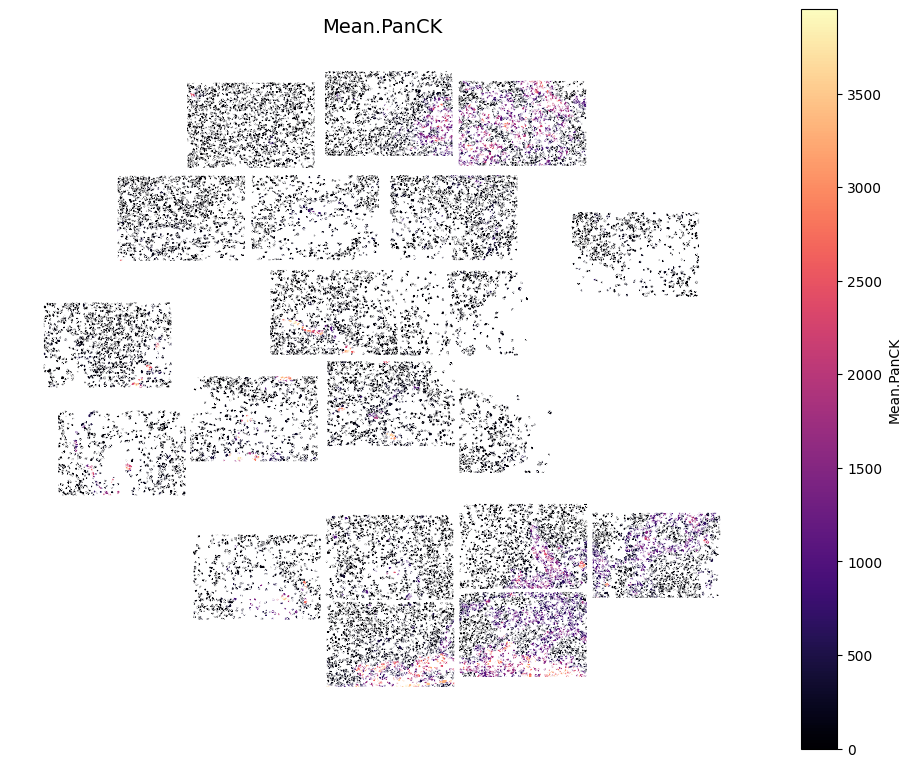

In [6]:
sj.visualization.plot_global_polygon(
    sp,
    feature="Mean.PanCK",            # numeric column in cell_meta
    background_img=None,    # pass None to skip background
    min_x=min_x, min_y=min_y,
    colormap="magma",
    save_dir="./my_image_plots/",
    show_plot=True
)

In [6]:
cluster_colors = {
    '0': '#FF0000',
    '1': '#00FF00', 
    '2': '#0000FF',  
    '3': '#FFFF00',  
    '4': '#FF00FF',
    '5': '#E41A1C',
    '6': '#377EB8'
}

In [11]:
sj.visualization.plot_global_polygon(
    sp,
    feature="leiden",            # numeric column in cell_meta
    background_img=stitched,    # pass None to skip background
    min_x=min_x, min_y=min_y,
    color_map=cluster_colors,
    save_dir="./my_image_plots/",
    show_plot=False
    
)

Saved → ./my_image_plots/polygon_leiden_global_categorical_with_bg.png


In [12]:
sj.visualization.plot_local_polygon(
    sp,
    feature="leiden",
    fov_ids=["001", "002", "004"],    # or None to plot all FOVs
    background_img=True,        # bool here: loads FOV image automatically
    grid_layout=(1, 3),         # 1 row, 3 cols
    save_dir="./my_image_plots/",
    color_map=cluster_colors,
    show_plot=False
)

Saved → ./my_image_plots/polygon_leiden_local_categorical_with_bg.png


Converting to GeoDataFrame (local coordinates)...
  ✓ Created GeoDataFrame: 25368 cells
Saved → ./my_image_plots/polygon_leiden_local_categorical.png


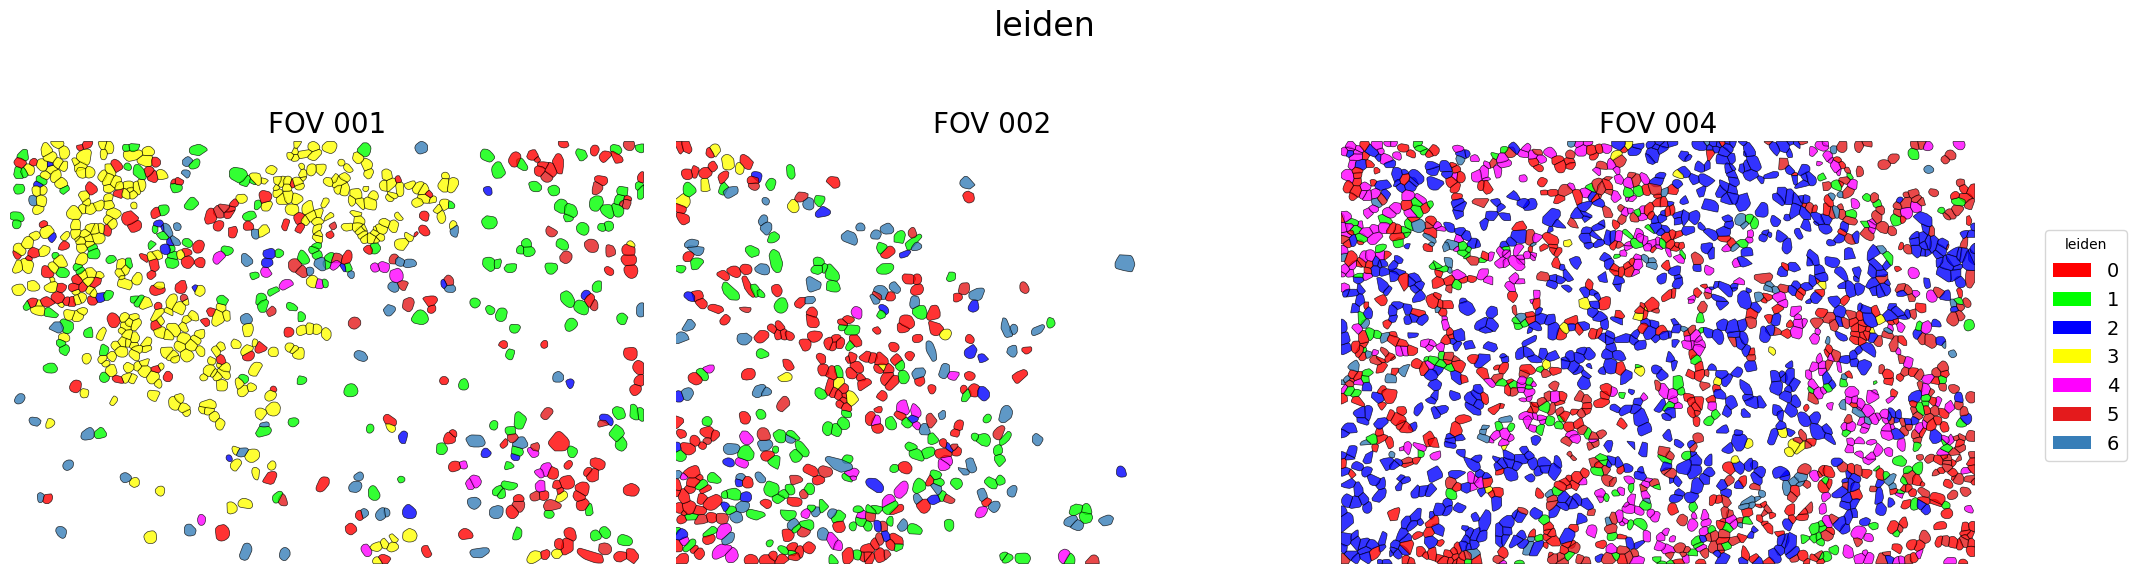

In [7]:
sj.visualization.plot_local_polygon(
    sp,
    feature="leiden",
    fov_ids=["001", "002", "004"],    # or None to plot all FOVs
    background_img=False,        # bool here: loads FOV image automatically
    grid_layout=(1, 3),         # 1 row, 3 cols
    save_dir="./my_image_plots/",
    color_map=cluster_colors,
    show_plot=True
)

In [15]:
sj.visualization.plot_local_polygon(
    sp,
    feature="Mean.PanCK",
    fov_ids=["001", "002", "004"],    # or None to plot all FOVs
    background_img=False,        # bool here: loads FOV image automatically
    grid_layout=(1, 3),         # 1 row, 3 cols
    save_dir="./my_image_plots/",
    colormap="magma",
    edge_width=0.1,
    show_plot=False
)

/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:545: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


Saved → ./my_image_plots/polygon_mean.panck_local_continuous.png


In [16]:
sj.visualization.plot_global_dots(
    sp,
    feature="Mean.PanCK",
    background_img=stitched,
    min_x=min_x, min_y=min_y,
    dot_size=10,
    save_dir="./my_image_plots/",
    edge_width=0.1,
    show_plot=False
)

sj.visualization.plot_global_dots(
    sp,
    feature="leiden",        # categorical → auto-detected
    background_img=stitched,
    min_x=min_x, min_y=min_y,
    dot_size=10,
    save_dir="./my_image_plots/",
    show_plot=False
)

Saved → ./my_image_plots/dots_mean.panck_global_continuous_with_bg.png


/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:587: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cat, grp in df.groupby(feature):


Saved → ./my_image_plots/dots_leiden_global_categorical_with_bg.png


In [19]:
sj.visualization.plot_local_dots(
    sp,
    feature="leiden",
    fov_ids=["001", "002", "004"],
    background_img=True,        # bool here: loads FOV image automatically
    grid_layout=(1, 3),         # 1 row, 3 cols
    save_dir="./my_image_plots/",
    color_map=cluster_colors,
    show_plot=False
)

/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:587: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cat, grp in df.groupby(feature):


Saved → ./my_image_plots/dots_leiden_local_categorical_with_bg.png


In [20]:
sj.visualization.plot_local_dots(
    sp,
    feature="leiden",
    fov_ids=["001", "002", "004"],
    background_img=False,        # bool here: loads FOV image automatically
    grid_layout=(1, 3),         # 1 row, 3 cols
    save_dir="./my_image_plots/",
    color_map=cluster_colors,
    show_plot=False
)

/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:587: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cat, grp in df.groupby(feature):


Saved → ./my_image_plots/dots_leiden_local_categorical.png


In [11]:
for i in sp.layers.keys():
    print(f'available layers: {i}')

available layers: normalized_counts
available layers: log_normalized
available layers: scaled
available layers: magic_imputed


In [10]:
sj.visualization.plot_global_polygon_gene(
    sp,
    gene='EPCAM',
    layer='log_normalized',
    background_img=stitched,
    min_x=min_x, min_y=min_y,
    colormap='magma',
    save_dir="./my_image_plots/",
    show_plot=False,
)

Converting to GeoDataFrame (global coordinates)...
  ✓ Created GeoDataFrame: 25368 cells
Saved → ./my_image_plots/polygon_EPCAM_log_normalized_global_bg.png


In [9]:
sj.visualization.plot_global_polygon_gene(
    sp,
    gene='CD3D',
    layer='log_normalized',
    background_img=None,
    colormap='viridis',
    save_dir="./my_image_plots/",
    show_plot=False,
    min_x=min_x, min_y=min_y,
)

Converting to GeoDataFrame (global coordinates)...
  ✓ Created GeoDataFrame: 25368 cells
Saved → ./my_image_plots/polygon_CD3D_log_normalized_global.png


In [8]:
sj.visualization.plot_local_polygon_gene(
    sp,
    gene='EPCAM',
    layer='log_normalized',
    fov_ids=['001', '002', '004'],
    background_img=True,
    grid_layout=(1, 3),
    colormap='magma',
    save_dir="./my_image_plots/",
    show_plot=False,
)

sj.visualization.plot_local_polygon_gene(
    sp,
    gene='EPCAM',
    layer='log_normalized',
    fov_ids=['001', '002', '004'],
    background_img=False,
    grid_layout=(1, 3),
    colormap='magma',
    save_dir="./my_image_plots/",
    show_plot=False,
)

Converting to GeoDataFrame (local coordinates)...
  ✓ Created GeoDataFrame: 25368 cells


/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:537: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


Saved → ./my_image_plots/polygon_EPCAM_log_normalized_local_bg.png
Converting to GeoDataFrame (local coordinates)...
  ✓ Created GeoDataFrame: 25368 cells


/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:537: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


Saved → ./my_image_plots/polygon_EPCAM_log_normalized_local.png


In [7]:
sj.visualization.plot_global_dots_gene(
    sp,
    gene='EPCAM',
    layer='log_normalized',
    background_img=stitched,
    min_x=min_x, min_y=min_y,
    dot_size=5,
    colormap='magma',
    save_dir="./my_image_plots/",
    show_plot=False,
)

sj.visualization.plot_local_dots_gene(
    sp,
    gene='EPCAM',
    layer='log_normalized',
    fov_ids=['001', '002', '004'],
    background_img=True,
    grid_layout=(1, 3),
    dot_size=10,
    colormap='magma',
    save_dir="./my_image_plots/",
    show_plot=False,
)


Saved → ./my_image_plots/dots_EPCAM_log_normalized_global_bg.png


/carc/scratch/projects/amitra2016502/spatioloji_s/src/spatioloji_s/visualization/plots.py:851: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


Saved → ./my_image_plots/dots_EPCAM_log_normalized_local_bg.png
